# DL(w7) RNN
student ID: 7110018036\
name: Chieh-An, Chou

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-04-19 14:02:54.382191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Predict 1 Step Ahead
### Data

In [2]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,m,1)
    time = np.linspace(0,1,n_seq)
    series = 0.5*np.cos((time-offsets1)*(freq1*10+10))
    series+= 0.3*np.sin((time-offsets2)*(freq2*20+20))
    series+= 0.1*(np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(1)
n_seq = 30
n_pred = 1

series = generate_time_series(5000, n_seq+n_pred)
series.shape

(5000, 31, 1)

In [4]:
x_train, y_train = series[:3000, :n_seq], series[:3000, -1]
x_valid, y_valid = series[3000:4000, :n_seq], series[3000:4000, -1]
x_test, y_test = series[4000:, :n_seq], series[4000:, -1]

x_train.shape, y_train.shape

((3000, 30, 1), (3000, 1))

In [5]:
def plot_seq(x,y,y_pred= None):
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.hlines(0,0,n_seq+ahead,linewidth=1, colors='black')
    plt.plot(x, '.-')
    plt.plot(np.arange(n_seq, n_seq+ahead), y, 'go-', label='$y$')  # 'go' = green 'o' 
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq+ahead), y_pred, 'rx-',      # 'rx' = red 'x' 
                 label='$\hat y$', markersize = 10)
    plt.axis([0,n_seq+ahead,-1,1])                                  # seting range of x-axis and y-axis
    plt.grid(True)
    plt.legend(fontsize = 14)

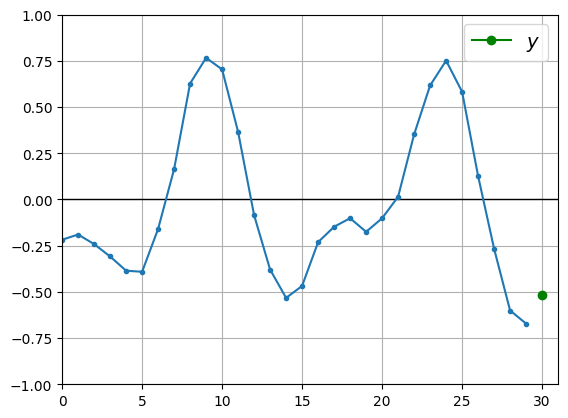

In [6]:
plot_seq(x_test[0,:,0], y_test[0])

## Simple RNN
### 1. Build Model

In [7]:
np.random.seed(1)
tf.random.set_seed(1)
keras.backend.clear_session()

$\text{Params} = (b+w_x+w_h)\times N_\text{out}=(1+1+1)\times 1$

In [8]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]) # activation = 'tanh'
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2023-04-19 14:02:56.019238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 14:02:56.019660: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64:/usr/local/cuda/lib64:/home/luhung/.venv/tf/lib/python3.10/site-packages/tensorrt/:/home/luhung/.venv/tf/lib/python3.10/site-packages/nvidia/cuda_runtime/lib/
2023-04-19 14:02:56.041520: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/li

### 2. Compile

In [9]:
opt = keras.optimizers.Adam(learning_rate=.005)
model.compile(loss='mse', optimizer=opt)

### 3. Train 

In [10]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 1s 5ms/step - loss: 0.1707 - val_loss: 0.1312
Epoch 2/20
94/94 [==============================] - 0s 3ms/step - loss: 0.1044 - val_loss: 0.0745
Epoch 3/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0606 - val_loss: 0.0462
Epoch 4/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0379
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.0342
Epoch 6/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.0318
Epoch 7/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.0302
Epoch 8/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0310 - val_loss: 0.0294
Epoch 9/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.0288
Epoch 10/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0286
Epoch 11/20
94/94 [

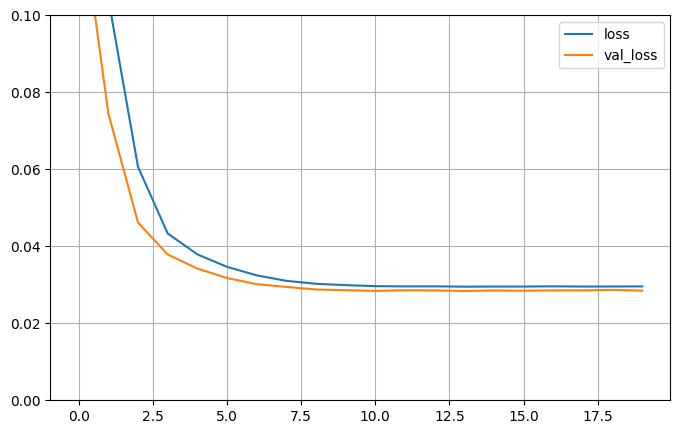

In [11]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

### 4. Evaluate

In [12]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0306


0.0306343212723732

### 5. Predict

32/32 [==============================] - 0s 1ms/step


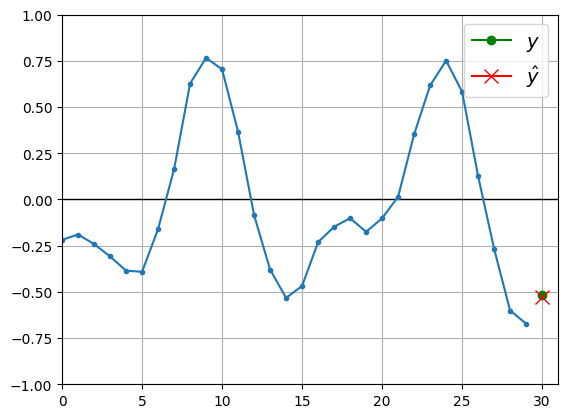

In [13]:
y_pred = model.predict(x_test,)
i = 0
plot_seq(x_test[i,:,0], y_test[i], y_pred[i])

## Deep RNN
### 1. Build Model

In [14]:
np.random.seed(1)
tf.random.set_seed(1)

> Note: `return_sequences=True` must be setted if the next layer is still an RNN layer.

In [15]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    keras.layers.SimpleRNN(20, return_sequences=True,),
    keras.layers.SimpleRNN(1) 
])

$\text{Params} = (1+N_\text{in}+N_\text{out})\times N_\text{out}$
+ simple_rnn_1: (1+1+20)*20
+ simple_rnn_2: (1+20+20)*20
+ simple_rnn_3: (1+20+1)*1

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


### 2. Compile

In [17]:
model.compile(loss='mse', optimizer='adam')

### 3. Train 

In [18]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 2s 9ms/step - loss: 0.2021 - val_loss: 0.0363
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0252 - val_loss: 0.0192
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0175 - val_loss: 0.0146
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0122 - val_loss: 0.0125
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0116 - val_loss: 0.0093
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 8/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 9/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 10/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 11/20
94/94 [

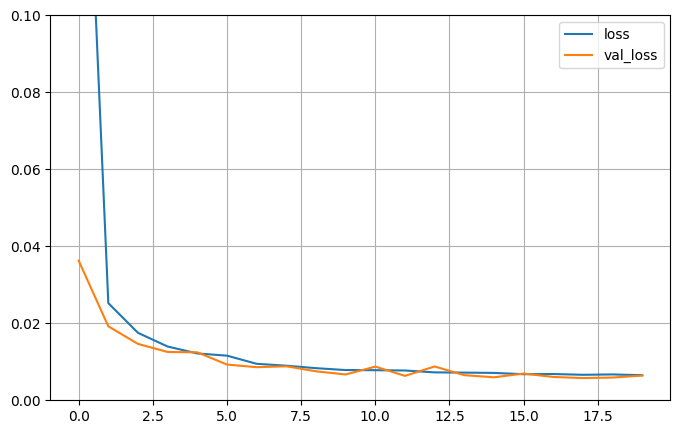

In [19]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

### 4. Evaluate

In [20]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0070


0.007007222156971693

### 5. Predict

32/32 [==============================] - 0s 2ms/step


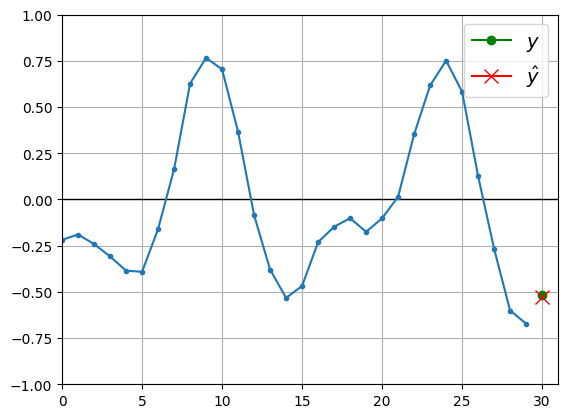

In [21]:
y_pred = model.predict(x_test,)
i = 0
plot_seq(x_test[i,:,0], y_test[i], y_pred[i])

## Deep RNN (dense output layer)
### 1. Build Model

In [22]:
np.random.seed(1)
tf.random.set_seed(1)

> Note: `return_sequences=True` must be setted if next layer is still an RNN layer.

In [23]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

$\text{Params} = (b+N_\text{in}+N_\text{out})\times N_\text{out}$
+ simple_rnn_1: (1+1+20)*20
+ simple_rnn_2: (1+20+20)*20
+ dense: (1+20)*1

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


### 2. Compile

In [25]:
model.compile(loss='mse', optimizer='adam')

### 3. Train 

In [26]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0994 - val_loss: 0.0177
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.0102
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 8/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 9/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 10/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 11/20
94/94 [

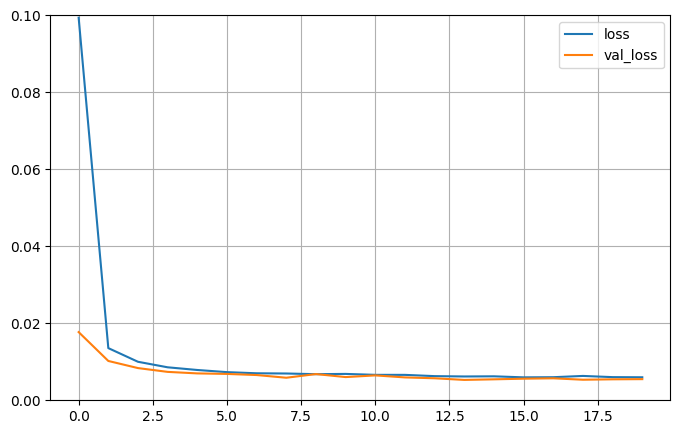

In [27]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

### 4. Evaluate

In [28]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0061


0.006120478734374046

### 5. Predict

32/32 [==============================] - 0s 1ms/step


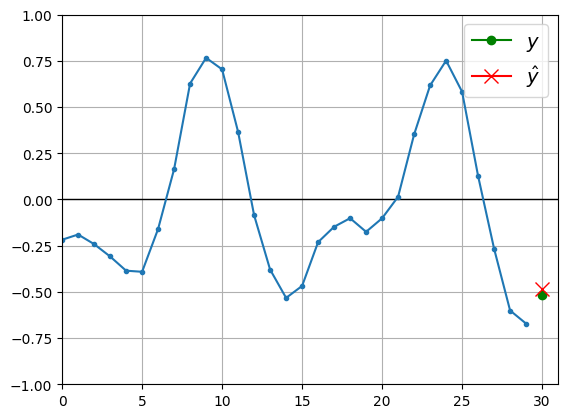

In [29]:
y_pred = model.predict(x_test,)
i = 0
plot_seq(x_test[i,:,0], y_test[i], y_pred[i])

# Predict 10 Step Ahead
# Sequence to Vector Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-04-19 15:02:10.752509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 15:02:10.823826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64:/usr/local/cuda/lib64:/home/luhung/.venv/tf/lib/python3.10/site-packages/tensorrt/:/home/luhung/.venv/tf/lib/
2023-04-19 15:02:10.823839: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Data (Sequence to Vector)

In [2]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,m,1)
    time = np.linspace(0,1,n_seq)
    series = 0.5*np.cos((time-offsets1)*(freq1*10+10))
    series+= 0.3*np.sin((time-offsets2)*(freq2*20+20))
    series+= 0.1*(np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(1)
n_seq = 30
n_pred = 10

series = generate_time_series(5000, n_seq+n_pred)
series.shape

(5000, 40, 1)

In [4]:
x_train, y_train = series[:3000, :n_seq], series[:3000, -n_pred:, 0]
x_valid, y_valid = series[3000:4000, :n_seq], series[3000:4000, -n_pred:, 0]
x_test, y_test = series[4000:, :n_seq], series[4000:, -n_pred:, 0]

x_train.shape, y_train.shape

((3000, 30, 1), (3000, 10))

In [5]:
def plot_seq(x,y,y_pred= None):
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.hlines(0,0,n_seq+ahead,linewidth=1, colors='black')
    plt.plot(x, '.-')
    plt.plot(np.arange(n_seq, n_seq+ahead), y, 'go-', label='$y$')  # 'go' = green 'o' 
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq+ahead), y_pred, 'rx-',      # 'rx' = red 'x' 
                 label='$\hat y$', markersize = 10)
    plt.axis([0,n_seq+ahead,-1,1])                                  # seting range of x-axis and y-axis
    plt.grid(True)
    plt.legend(fontsize = 14)

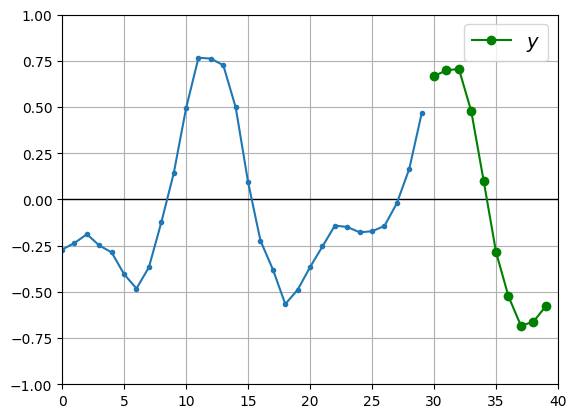

In [6]:
plot_seq(x_test[0,:,0], y_test[0])

## RNN: Sequence to Vector Networks
### 1. Build Model

In [7]:
np.random.seed(1)
tf.random.set_seed(1)
keras.backend.clear_session()

+ simple_rnn: (1+1+20)*20
+ simple_rnn_2: (1+20+20)*20
+ dense: (1+20)*10

In [8]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) 
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


2023-04-19 15:02:12.493236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 15:02:12.493455: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64:/usr/local/cuda/lib64:/home/luhung/.venv/tf/lib/python3.10/site-packages/tensorrt/:/home/luhung/.venv/tf/lib/
2023-04-19 15:02:12.493593: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64:/usr/

### 2. Compile

In [9]:
model.compile(loss='mse', optimizer='adam')

### 3. Train 

In [10]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.1312 - val_loss: 0.0958
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0819 - val_loss: 0.0762
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0694 - val_loss: 0.0655
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0620 - val_loss: 0.0601
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.0515
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0479 - val_loss: 0.0468
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0436 - val_loss: 0.0425
Epoch 8/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0383
Epoch 9/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0367 - val_loss: 0.0372
Epoch 10/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0351 - val_loss: 0.0345
Epoch 11/20
94/94 [

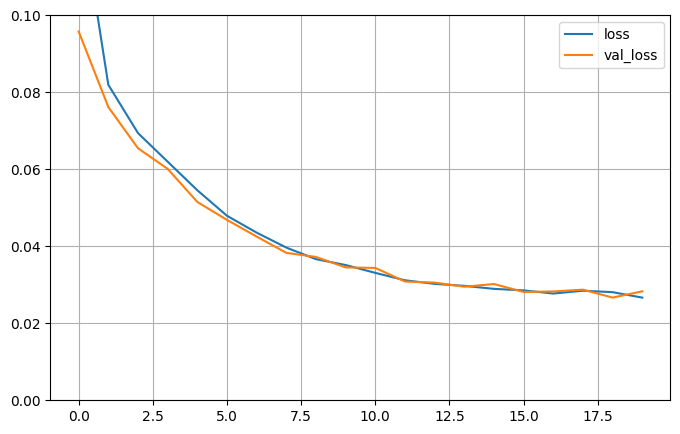

In [11]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

### 4. Evaluate

In [12]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0283


0.028278129175305367

### 5. Predict

32/32 [==============================] - 0s 1ms/step


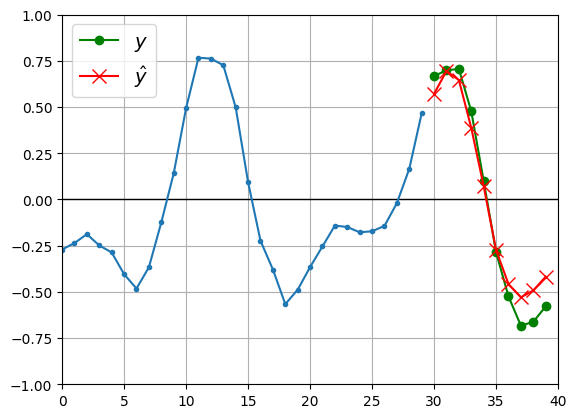

In [13]:
y_pred = model.predict(x_test,)
i = 0
plot_seq(x_test[i,:,0], y_test[i], y_pred[i])

## Data (Sequence to Sequence)

In [14]:
np.random.seed(1)
n_seq = 30
n_pred = 10

series = generate_time_series(5000, n_seq+n_pred)
series.shape

(5000, 40, 1)

In [15]:
x_train = series[:3000, :n_seq]
x_valid = series[3000:4000, :n_seq]
x_test  = series[4000:, :n_seq]

y = np.empty((5000, n_seq, n_pred))
for step_ahead in range(1, n_pred+1):
    y[..., step_ahead-1] = series[..., step_ahead:step_ahead+n_seq, 0]

y_train = y[:3000]
y_valid = y[3000:4000]
y_test  = y[4000:]

x_train.shape, y_train.shape

((3000, 30, 1), (3000, 30, 10))

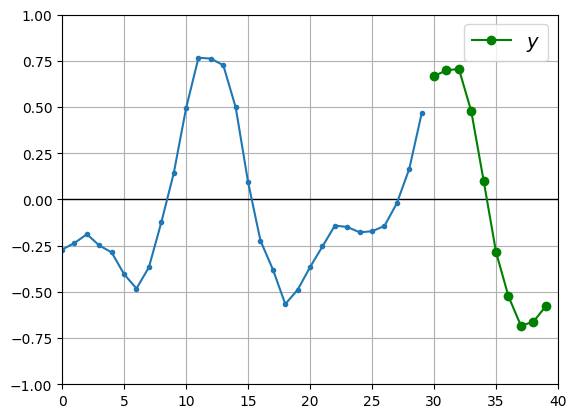

In [16]:
plot_seq(x_test[0,:,0], y_test[0, -1])

## RNN: Sequence to Sequence Networks
### 1. Build Model

In [17]:
np.random.seed(1)
tf.random.set_seed(1)

+ time_distributed: (1+20)*10 (still like dense)

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 time_distributed (TimeDistr  (None, None, 10)         210       
 ibuted)                                                         
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


### 2. Compile

In [19]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=.01),
              metrics=[last_time_step_mse])

### 3. Train 

In [20]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0993 - last_time_step_mse: 0.0907 - val_loss: 0.0845 - val_last_time_step_mse: 0.0744
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0822 - last_time_step_mse: 0.0680 - val_loss: 0.0835 - val_last_time_step_mse: 0.0694
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0762 - last_time_step_mse: 0.0588 - val_loss: 0.0742 - val_last_time_step_mse: 0.0592
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0719 - last_time_step_mse: 0.0536 - val_loss: 0.0675 - val_last_time_step_mse: 0.0511
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0667 - last_time_step_mse: 0.0461 - val_loss: 0.0635 - val_last_time_step_mse: 0.0466
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0592 - last_time_step_mse: 0.0357 - val_loss: 0.0507 - val_last_time_step_mse: 0.0259
Epoch 7/20
94/94 [======================

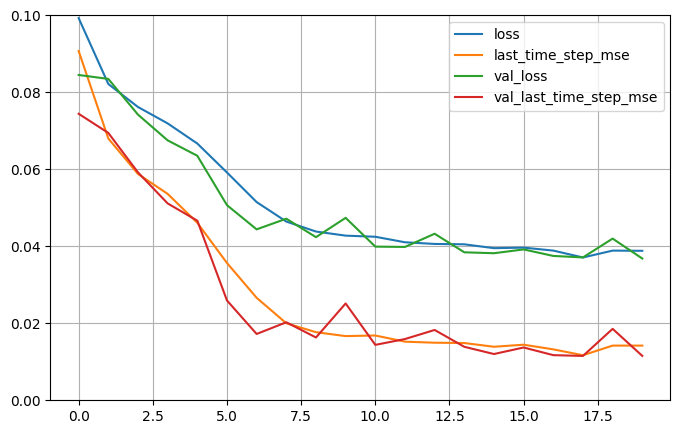

In [21]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

### 4. Evaluate

In [22]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0366 - last_time_step_mse: 0.0109


[0.03659111633896828, 0.010863821022212505]

### 5. Predict

In [23]:
y_pred = model.predict(x_test,)
y_test.shape, y_pred.shape

32/32 [==============================] - 0s 2ms/step


((1000, 30, 10), (1000, 30, 10))

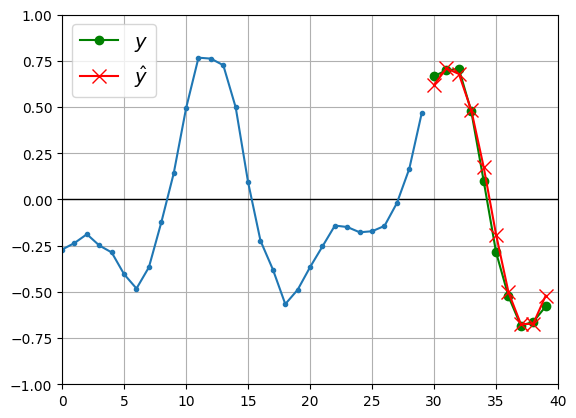

In [24]:
i = 0
plot_seq(x_test[i,:,0], y_test[i,-1], y_pred[i,-1])